In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importation des données

In [2]:
phone = pd.read_csv("data/cleaned/cleaned_data.csv")

In [3]:
phone.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


# Les modèles classiques

Nous allons utiliser différents types de modèles classiques pour prédire la gamme de prix des téléphones. Nous allons commencer par le modèle Naive Bayes, qui est un modèle probabiliste simple pour les problèmes de classification.

Il faut se poser la question de savoir quelle métrique nous allons utiliser pour évaluer les performances des modèles. Vu que nous n'utilisons que des modèles de classification, nous allons devoir choisir entre la précision, le rappel, la précision ou le F1-score.

La justesse : C'est le nombre de prédictions correctes divisé par le nombre total de prédictions. Notre objectif est de faire en sorte qu'elle soit le plus élevée. C'est une bonne métrique en général et celle que nous prendrons par défaut. Mais est-ce qu'il existe une métrique qui serait plus adaptée à notre problème ?

La précision : C'est le nombre de prédictions correctes divisé par le nombre total de prédictions positives. C'est une bonne métrique si nous voulons minimiser les faux positifs. Utiliser cette métrique signifie que nous voulons éviter au maximum les erreurs de classification positives, c'est-à-dire que nous voulons éviter de prédire qu'un téléphone est dans une gamme de prix alors qu'il n'y est pas.

Le rappel : C'est le nombre de prédictions correctes divisé par le nombre total de prédictions positives réelles. C'est une bonne métrique si nous voulons minimiser les faux négatifs. Utiliser cette métrique signifie que nous voulons éviter au maximum les erreurs de classification négatives, c'est-à-dire que nous voulons éviter de prédire qu'un téléphone n'est pas dans une gamme de prix alors qu'il y est.

Le F1-score : C'est la moyenne harmonique de la précision et du rappel. C'est une bonne métrique si nous voulons minimiser les faux positifs et les faux négatifs. Utiliser cette métrique signifie que nous voulons éviter au maximum les erreurs de classification, qu'elles soient positives ou négatives.

Dans notre cas, utiliser la précision ou le rappel revient au même et n'a pas d'impact majeur que ce soit d'un point de vue technique ou éthique. Nous allons donc utiliser la justesse comme métrique par défaut pour évaluer les performances des modèles.

## Les modèles simples

### Gaussian Naive Bayes

Commençons par créer un modèle Gaussian Naive Bayes. Nous utiliserons directement une validation croisée pour évaluer les performances du modèle.

In [4]:
X = phone.drop(columns=["price_range"])
y = phone["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb_model = GaussianNB()
cvs = cross_val_score(gnb_model, X, y, cv=5)
np.mean(cvs)

0.809295739348371

In [5]:
best_scores = {
    "gnb": np.mean(cvs)
}

best_parameters = {
    "gnb": None
}

Le meilleur modèle est celui qui utilise l'intégralité des données avec une justesse de 0.80. Pour les prochaines modèles classiques, nous allons utiliser toutes les données.

Regardons maintenant un modèle d'arbre de décision.

### Decision Tree Classifier

Nous allons maintenant explorer le modèle `DecisionTreeClassifier` de la bibliothèque `sklearn`.

In [6]:
dtc_model = DecisionTreeClassifier()
parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [index for index in range(2, 20)],
    "min_samples_split": [index for index in range(2, 10)],
    "min_samples_leaf": [index for index in range(1, 4)]
}
grid_search = GridSearchCV(dtc_model, parameters, cv=5, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [7]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'log_loss', 'max_depth': 17, 'min_samples_leaf': 3, 'min_samples_split': 3}
Best score: 0.8543358395989975


In [8]:
best_scores["dtc"] = grid_search.best_score_
best_parameters["dtc"] = grid_search.best_params_

### K-Nearest Neighbors Classifier

Nous allons maintenant explorer le modèle `KNeighborsClassifier` de la bibliothèque `sklearn`.

In [9]:
knn_model = KNeighborsClassifier()
parameters = {
    "n_neighbors": [index for index in range(1, 10)],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "metric": ["minkowski"],
    "p": [1, 2, 3],
}
grid_search = GridSearchCV(knn_model, parameters, cv=5, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [10]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
Best score: 0.9319235588972431


In [11]:
best_scores["knn"] = grid_search.best_score_
best_parameters["knn"] = grid_search.best_params_

### SVC

Nous allons maintenant explorer le modèle `SVC` de la bibliothèque `sklearn`.

In [12]:
svc_model = SVC()

parameters = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "degree": [degree for degree in range(2, 4)],
#     "gamma": ["scale", "auto"]
}

grid_search = GridSearchCV(svc_model, parameters, cv=5, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [13]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'kernel': 'linear'}
Best score: 0.9729761904761904


In [14]:
best_scores["svc"] = grid_search.best_score_
best_parameters["svc"] = grid_search.best_params_

### Multi Layers Perceptron

Nous allons maintenant explorer le modèle `MLPClassifier` de la bibliothèque `sklearn`.

In [15]:
mlp_model = MLPClassifier()

architectures=[
    (100,),
    (50, 50,),
    (50, 100, 50,),
    (50, 100, 50, 100, 50,),
]

parameters = {
    "hidden_layer_sizes": architectures,
    "activation": ["identity", "logistic", "tanh", "relu"],
    "max_iter": [600],
    "solver": ["adam"],
    # "alpha": [0.0001, 0.001, 0.01, 0.1],
    # "learning_rate": ["constant", "invscaling", "adaptive"]
}

grid_search = GridSearchCV(mlp_model, parameters, cv=5, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50),
                                                (50, 100, 50, 100, 50)],
                         'max_iter': [600], 'solver': ['adam']},
             scoring='accuracy')

In [16]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 600, 'solver': 'adam'}
Best score: 0.7237180451127819


In [17]:
best_scores["mlp"] = grid_search.best_score_
best_parameters["mlp"] = grid_search.best_params_

Maintenant que nous avons testé les grandes familles de modèles classiques, comparons les résultats obtenus.

## Comparaison des modèles

Nous allons comparer les modèles en utilisant la justesse comme métrique.

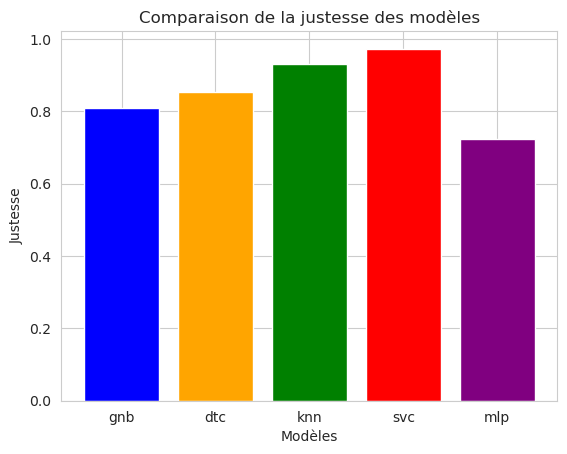

In [18]:
plt.bar(
    best_scores.keys(),
    best_scores.values(),
    color=['blue', 'orange', 'green', 'red', 'purple']
)
plt.title("Comparaison de la justesse des modèles")
plt.xlabel("Modèles")
plt.ylabel("Justesse")
plt.show()

On voit nettement que le modèle de réseau neuronal est le moins performant. Parmi les autres modèles, c'est le SVC qui obtient la meilleure justesse.

In [19]:
best_accuracy = np.max(list(best_scores.values()))
"""Ecriture dans une variable de la clé du modèle ayant la meilleure justesse"""
best_model = [key for key, value in best_scores.items() if value == best_accuracy][0]

print(f"Le meilleur modèle est {best_model} avec une justesse de {best_accuracy:.2f}.")
print(f"Les paramètres du meilleur modèle sont : {best_parameters[best_model]}.")

Le meilleur modèle est svc avec une justesse de 0.97.
Les paramètres du meilleur modèle sont : {'kernel': 'linear'}.


# Conclusion

Le meilleur modèle est le SVC pour le moment. Il ne s'agit que d'une première version des modèles classiques. Nous pourrons améliorer les performances en utilisant d'autres techniques issues du SVM ou en améliorant la qualité des données.